# 不同亮度下红点的坐标

看看屏幕在同样的纯红下（RGB：255,0,0），不同的亮度条件测出来的光谱有无变化

## 导入6组红光数据，生成光谱类实例

In [1]:
import os
os.getcwd()

'/home/edward/Documents/Major/jupyter_notebooks'

In [2]:
os.chdir('..')
os.getcwd()

'/home/edward/Documents/Major'

In [3]:
lst = [x for x in os.listdir('./spec_info/2018_10_05/') if x.startswith('green')]
lst.sort()
print(lst)

['green1_2018_10_05_16_39_00.sp', 'green2_2018_10_05_16_43_31.sp', 'green3_2018_10_05_16_46_55.sp', 'green4_2018_10_05_16_51_36.sp', 'green5_2018_10_05_16_55_02.sp', 'green6_2018_10_05_16_57_22.sp']


In [4]:
lst = [os.path.join('/home/edward/Documents/Major/spec_info/2018_10_05/', x) for x in lst]
print(lst)

['/home/edward/Documents/Major/spec_info/2018_10_05/green1_2018_10_05_16_39_00.sp', '/home/edward/Documents/Major/spec_info/2018_10_05/green2_2018_10_05_16_43_31.sp', '/home/edward/Documents/Major/spec_info/2018_10_05/green3_2018_10_05_16_46_55.sp', '/home/edward/Documents/Major/spec_info/2018_10_05/green4_2018_10_05_16_51_36.sp', '/home/edward/Documents/Major/spec_info/2018_10_05/green5_2018_10_05_16_55_02.sp', '/home/edward/Documents/Major/spec_info/2018_10_05/green6_2018_10_05_16_57_22.sp']


In [5]:
from spectool import *

/home/edward/anaconda3/envs/python-colour/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/edward/anaconda3/envs/python-colour/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/edward/anaconda3/envs/python-colour/lib/python3.6/site-packages/colour/utilities/verbose.py:141: ColourWarning: "x" independent variable is not uniform, unpredictable results may occur!
  warn(*args, **kwargs)


In [6]:
os.getcwd()

'/home/edward/Documents/Major'

In [7]:
green1 = Spectrum(lst[0], 'green1')
green2 = Spectrum(lst[1], 'green2')
green3 = Spectrum(lst[2], 'green3')
green4 = Spectrum(lst[3], 'green4')
green5 = Spectrum(lst[5], 'green5')
green6 = Spectrum(lst[4], 'green6')
spec_list = [green1, green2, green3, green4, green5, green6]

/home/edward/anaconda3/envs/python-colour/lib/python3.6/site-packages/colour/utilities/verbose.py:141: ColourWarning: "domain" and "range" variables have different size, "range" variable will be resized to "domain" variable shape!
  warn(*args, **kwargs)
/home/edward/anaconda3/envs/python-colour/lib/python3.6/site-packages/colour/utilities/verbose.py:141: ColourWarning: Aligning "D65" illuminant shape to "CIE 1931 2 Degree Standard Observer" colour matching functions shape.
  warn(*args, **kwargs)
/home/edward/anaconda3/envs/python-colour/lib/python3.6/site-packages/colour/utilities/verbose.py:141: ColourWarning: Aligning "green1" spectral power distribution shape to "CIE 1931 2 Degree Standard Observer" colour matching functions shape.
  warn(*args, **kwargs)
/home/edward/anaconda3/envs/python-colour/lib/python3.6/site-packages/colour/utilities/verbose.py:141: ColourWarning: Aligning "green2" spectral power distribution shape to "CIE 1931 2 Degree Standard Observer" colour matching fu

## 显示他们的亮度

In [8]:
L_lst = []
for spec in spec_list:
    L_lst.append(spec.get('L'))
    print(spec.name, "|", spec.get('L'), 'cd/m2')

green1 | 10.320598 cd/m2
green2 | 25.676975 cd/m2
green3 | 58.32892 cd/m2
green4 | 90.04072 cd/m2
green5 | 160.18323 cd/m2
green6 | 231.12743 cd/m2


## 亮度变化可视化

In [10]:
from pyecharts import Bar

In [11]:
attr = ['green1', 'green2', 'green3', 'green4', 'green5', 'green6']
bar = Bar("亮度变化", "六个红点样本的亮度")
bar.add("亮度值（cd/m2）", attr, L_lst, is_label_show=True)

## 显示样本的xy坐标

In [13]:
data = {
    'green1': {'x': green1.x,'y': green1.y}, 
    'green2': {'x': green2.x,'y': green2.y}, 
    'green3': {'x': green3.x,'y': green3.y}, 
    'green4': {'x': green4.x,'y': green4.y}, 
    'green5': {'x': green5.x,'y': green5.y}, 
    'green6': {'x': green6.x,'y': green6.y}, 
}
spec_xy = pd.DataFrame(data).T
print(spec_xy)

               x         y
green1  0.213339  0.722153
green2  0.213397  0.724191
green3  0.213340  0.724570
green4  0.213583  0.724839
green5  0.214717  0.723265
green6  0.215210  0.722776


In [15]:
spec_xy.loc[:,'x'].values

array([0.21333909, 0.21339707, 0.21333987, 0.21358347, 0.21471703,
       0.21521042])

In [16]:
from pyecharts import Line

In [17]:
v1 = list(spec_xy.loc[:,'x'].values)
v2 = list(spec_xy.loc[:,'y'].values)
attr = [str(x) for x in L_lst]
line = Line("白点随亮度变化的坐标变化")
line.add("x", attr, v1,mark_line=['average'])
line.add("y", attr, v2,mark_line=['average'])


## **结论：** 可以看出亮度基本不对绿点坐标造成影响, 6个样本的x，y值的平均值分别为（0.21, 0.72）

## 将六个绿点样本绘制在CIE1931图上

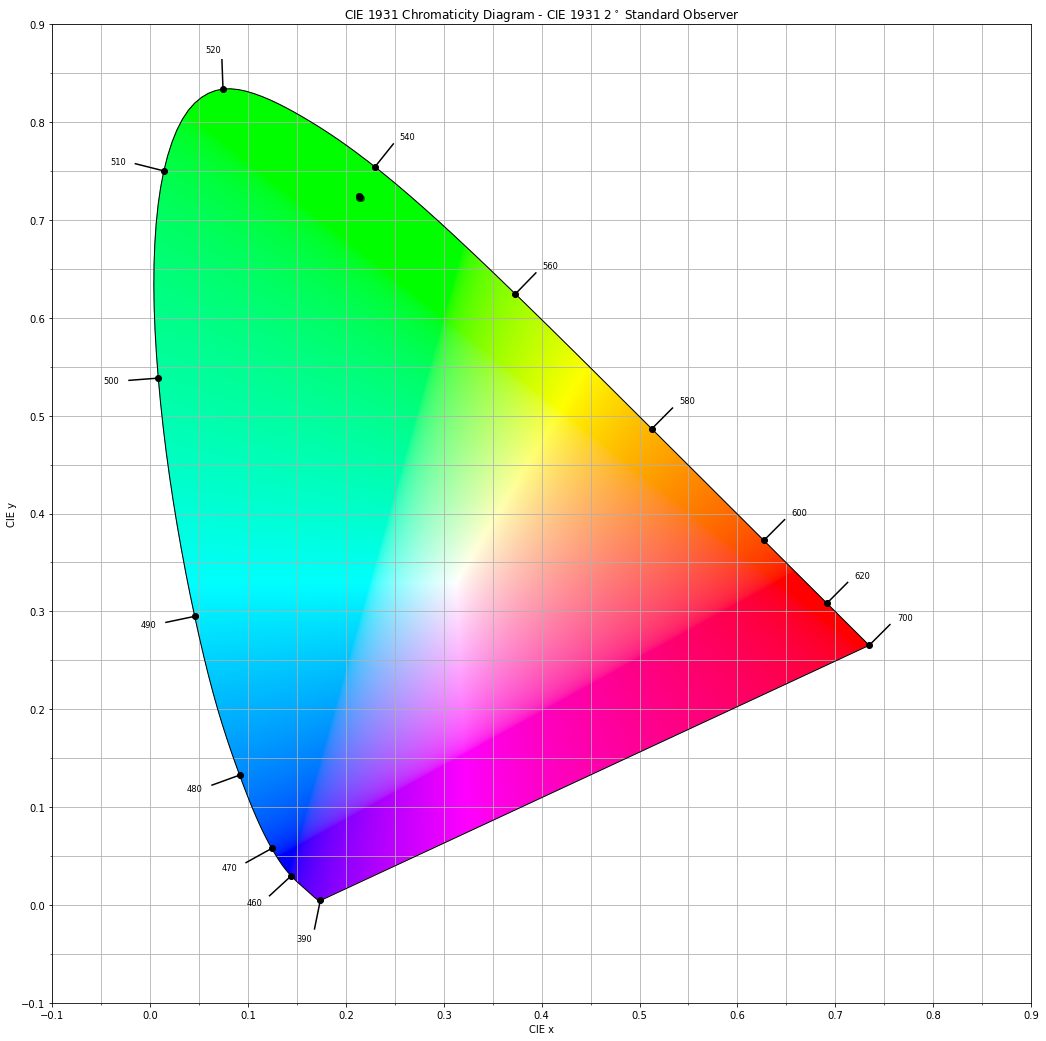

In [18]:
spcs_in_one_diagram(*spec_list)

## 总结： 在后续的实验研究过程中，绿点坐标取值（0.21, 0.72），不考虑亮度对其坐标值的影响

附：各个样本的光谱（可以看出，除了纵坐标有变化，能量值变大，图形基本一致）

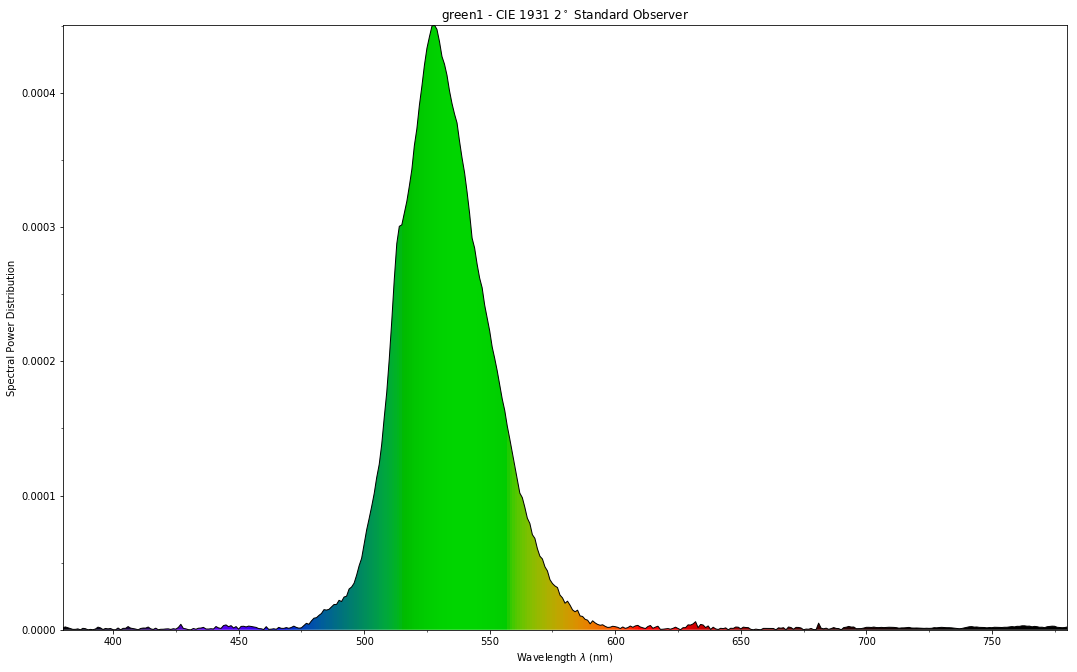

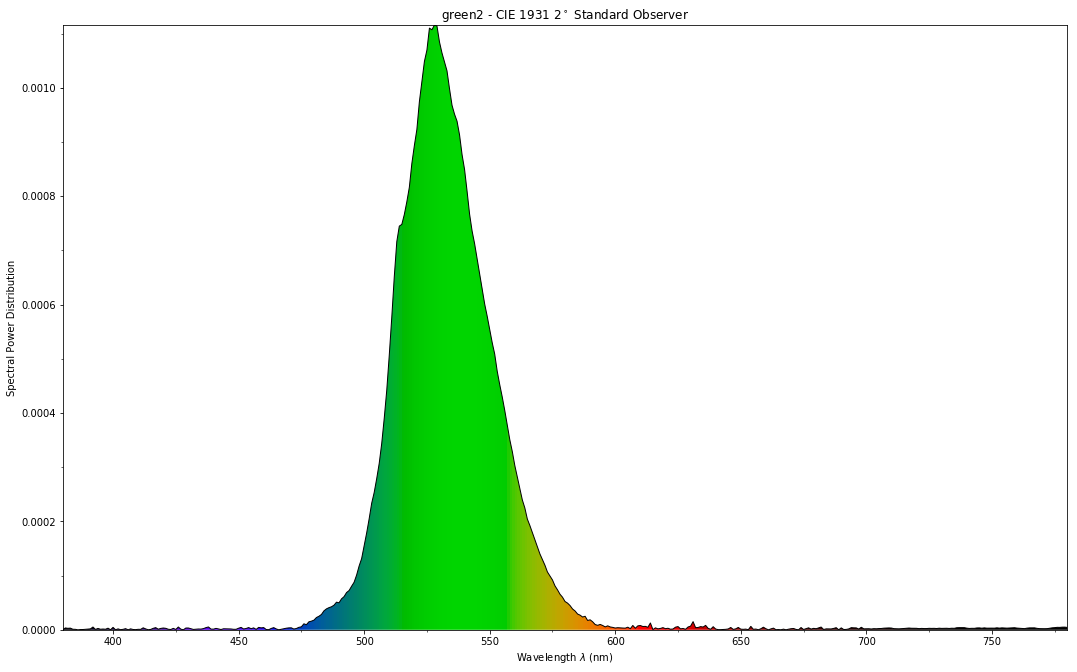

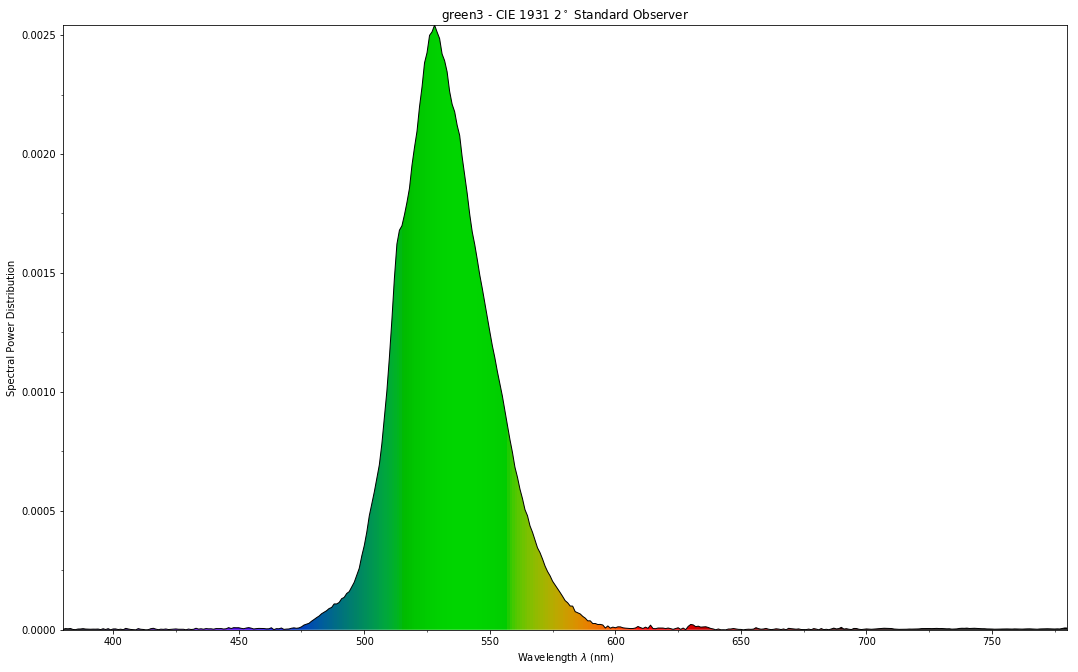

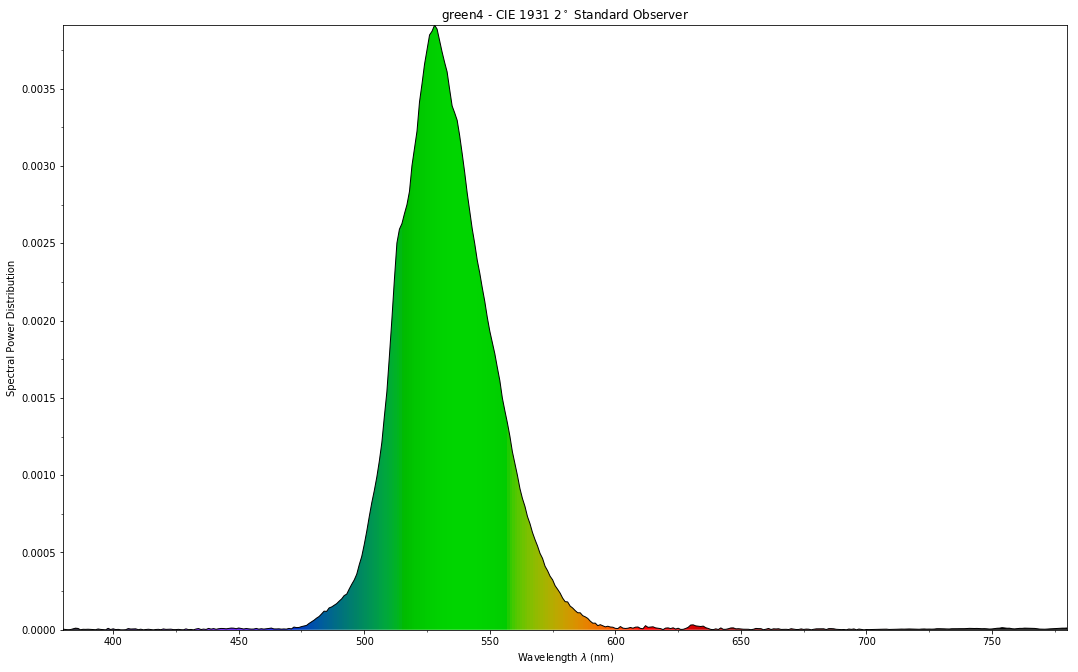

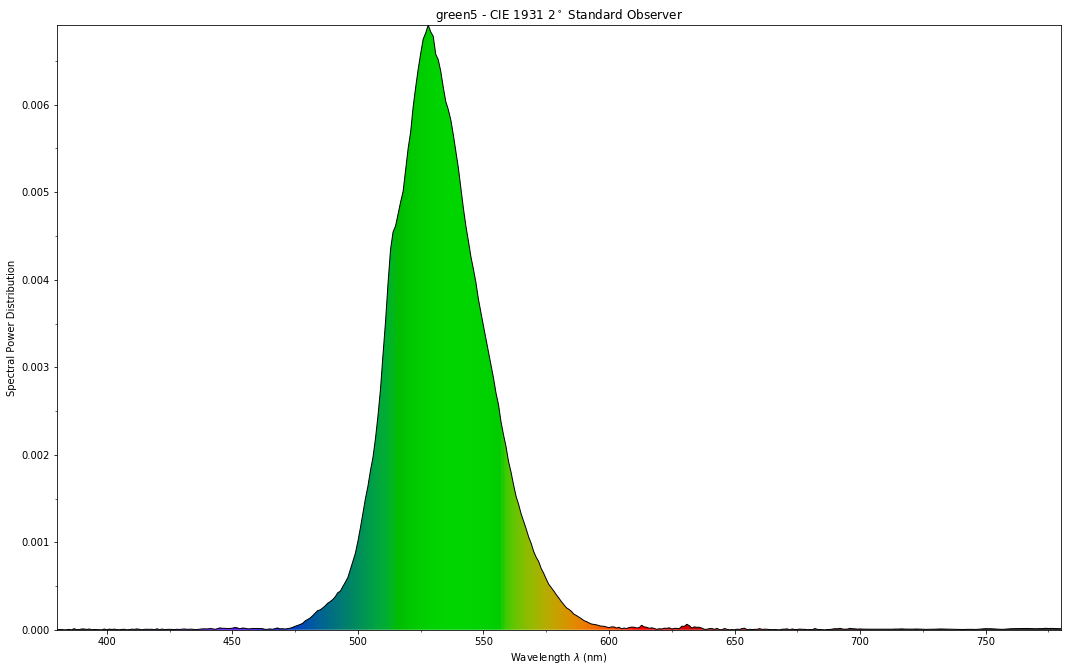

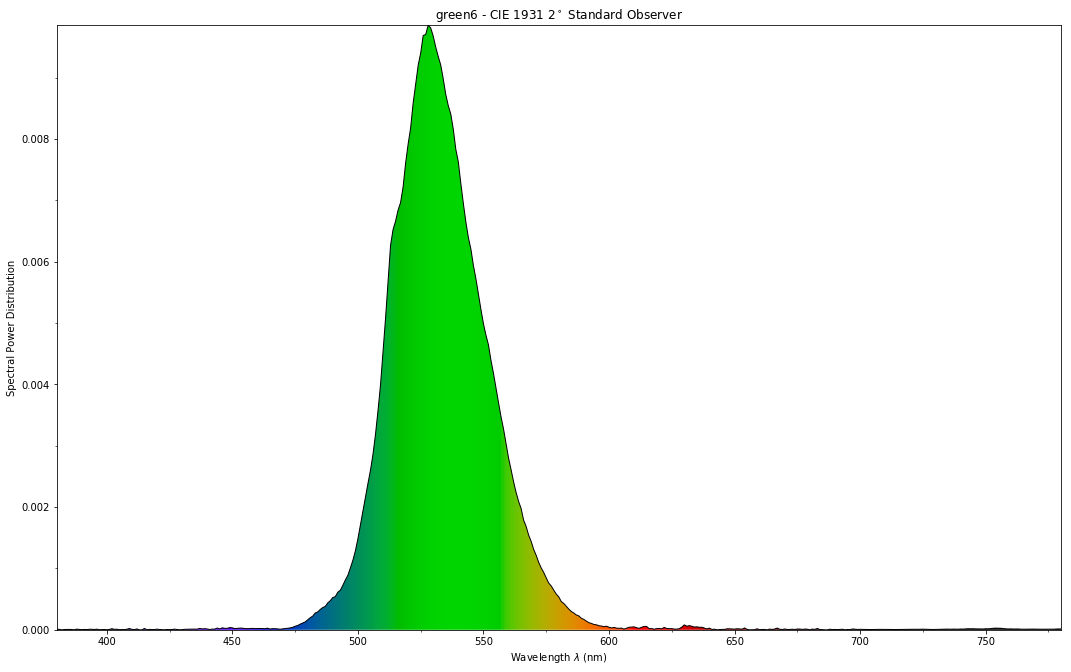

In [19]:
for spec in spec_list:
    spec.spd_plot()